# __Generation of stochastic DFNs__

### Problem statement
The fractured system in a rock mass is conceptualized as a population of individual fractures, each defined by a set of geometrical properties (e.g. position, size and orientation for a disc-shaped fracture, etc.). 
<br>
We here define fracture geometries in terms of statistical distributions and generate, in a  stochastic process, fractures conditioned to these distributions.

<center>
<div>
<img src="https://gitlab.com/fractorylab/dfnlab/-/raw/master/Tutorials/img/stochastic_generator.png" width="1000"/>
</div>
<br>
From statistical distributions of fracture geometrical properties to DFN realizations
</center>

### Theoretical background
Basic knowledge of statistical distributions is required for using stochastic DFN generation.
<br>
The most simple case is to generate fracture positions from a Poisson point process, either based on a uniform or fractal spatial density distribution [_[Darcel et al, 2003]_](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2002WR001628).
<br>
Fractures may be uniformly oriented or defined by an orientation distribution (e.g. [Fisher](https://www.rocscience.com/help/swedge/swedge/Fisher_Distribution.htm)), and their sizes may follow various multiscale distributions (power-law, exponential...)


### What will you learn ?
- How to define a stochastic DFN model. This includes at least fracture position, size, and orientation distributions
- An insight to currently supported distributions in DFN.Lab

### DFN.Lab model

In the three examples given here, we define stochastic DFN models and generate fractures, using one or several realizations in a cubic domain of size 100 units.

The required modules is __Generator__.

_____________

## Example 1: DFN with constant size and uniform orientations

We generate a DFN of percolation parameter (connectivity indicator) $p=1$ with constant fracture size (10 units) and uniformly random (i.e isotropic) orientations.
<br>
Fractures are independently positioned and uniformly distributed within the model volume (so called Poissonian distribution).

In [1]:
%reset -f

import dfnlab.System as sys
import dfnlab.Domains as dom
import dfnlab.Fractures as dfn
import dfnlab.Generator as gen
import os 

First, we initialize the system, made of a cubic domain and an empty DFN.

In [2]:
system = sys.System()
domain = dom.Domain()
domain.buildParallelepiped(center=[0, 0, 0], L1=100.)
system.setDomain(domain)
fnet = dfn.DFN()
system.setDFN(fnet)

The DFN statistical model is initialized in a generator object.<br>
The _generate_ command launches the generation process: fractures are generated in the domain based on a Poisson point process, until the target criteria (fracture number below) is reached.

In [3]:
pgenerator = gen.Generator(system, seed=1001)
pgenerator.setSizesUniform(lmin=10, lmax=10)
pgenerator.setPositionsUniform()
pgenerator.setOrientationsUniform()
pgenerator.setStopPercolation(1)
pgenerator.generate();

Finally, we build the system.

In [4]:
system.build()

We visualize the network. 

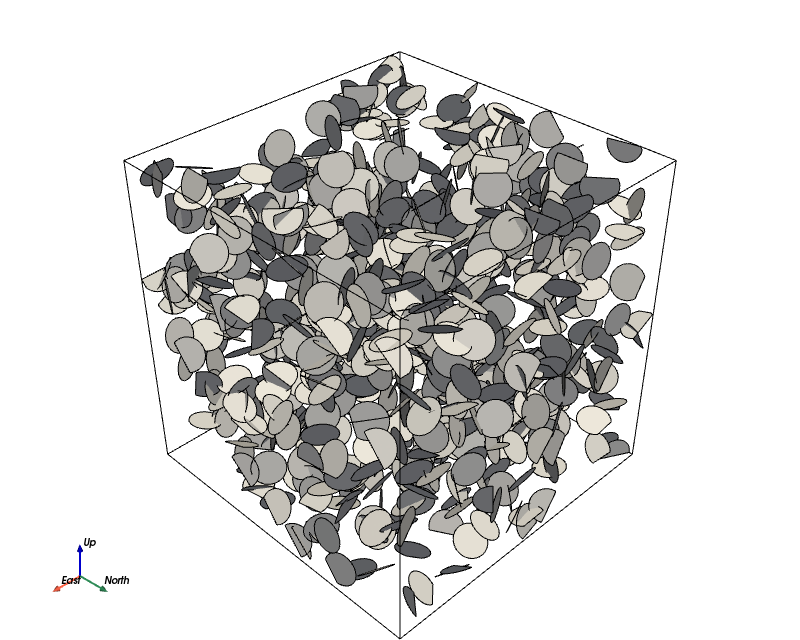

In [5]:
from sources.functions import plot_dfn
plot_dfn(system)

_____________

## Example 2: DFN with fractal positioning of fractures

In this example, fracture positions are defined as a fractal point process, defined by a correlation dimension $D_c$ and a refinement depth _iterations_. 
<br>
The fracture size distribution is a power-law in a range of 1 to 100 units, with a scaling exponent of 3.
<br>
The generation process stops when the network is made of 10000 fractures.

First, we initialize the system, made of a cubic domain and an empty DFN.

In [6]:
%reset -f

import dfnlab.System as sys
import dfnlab.Domains as dom
import dfnlab.Fractures as dfn
import dfnlab.Generator as gen
import os 

system = sys.System()
domain = dom.Domain()
system.setDomain(domain)
domain.buildParallelepiped(center=[0, 0, 0], L1=100.)
fnet = dfn.DFN()
system.setDFN(fnet)

Then we set the parameters distributions.

In [7]:
pgenerator = gen.Generator(system, seed=1001)
pgenerator.setSizesPowerlaw(a=3.,lmin=1.,lmax=100)
pgenerator.setPositionsFractal(Dc=2.7,iterations=6)
pgenerator.setOrientationsUniform()
pgenerator.setStopNumber(10000)

Finally, we generate the DFN and build the system.

In [8]:
pgenerator.generate()
system.build()

We can visualize the network.

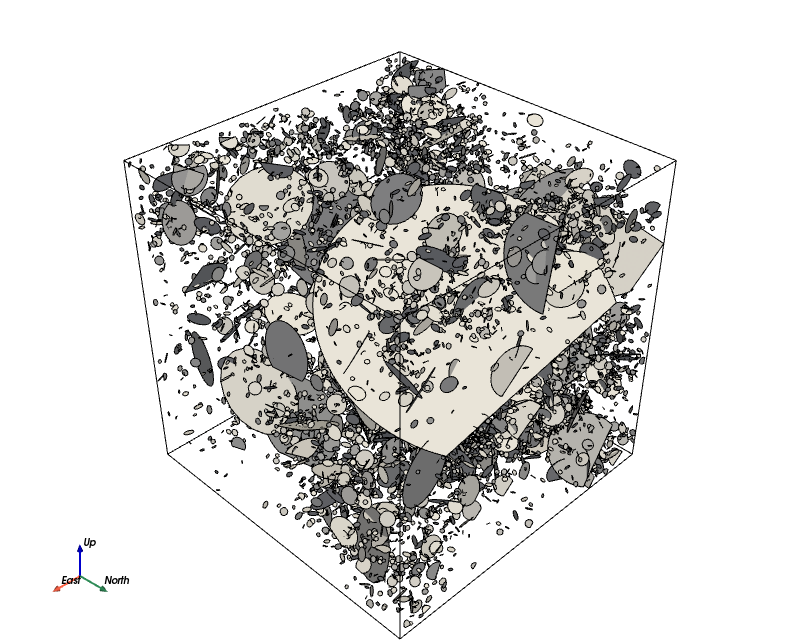

In [9]:
from sources.functions import plot_dfn
plot_dfn(system)

We can compare output and input metrics to check how well the generated DFN honors the statistical conditioning. 
<br>
Here we plot the derivative of the correlation pair function of fracture centers (to evaluate the output fractal dimension of the DFN).

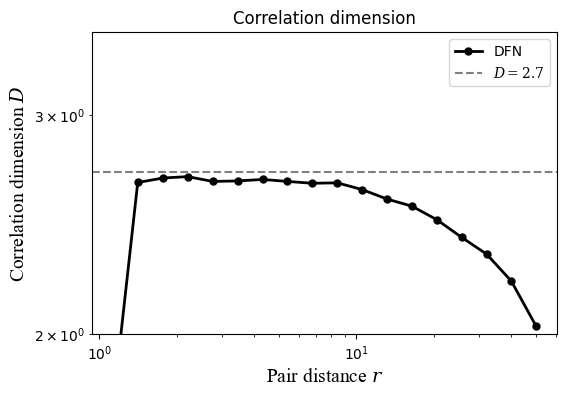

In [10]:
from sources.functions import plot_correlation_pair_function
plot_correlation_pair_function(system,2.7)

The output correlation dimension honours the input well, within the fracture size range that is not affected by censoring, i.e. within about 2-10 units.

_____________

## Example 3: DFN with power-law size distribution and two different Fisher orientation distributions

In this example, the fracture size distribution is a power-law in a range of 1 to 100 units, with a scaling exponent of 3.
<br>
Fracture positions obey a Poissonian distribution.
<br>
We create two independent fracture sets ("groups") with different Fisher orientation distributions, attached to the domain.

First, we initialize the system, made of a cubic domain and an empty DFN.

In [11]:
%reset -f

import dfnlab.System as sys
import dfnlab.Domains as dom
import dfnlab.Fractures as dfn
import dfnlab.Generator as gen
import os 

system = sys.System()
domain = dom.Domain()
system.setDomain(domain)
domain.buildParallelepiped(center=[0, 0, 0], L1=100.)
fnet = dfn.DFN()
system.setDFN(fnet)

Then we initialize the generator object.

In [12]:
generator = gen.Generator(system,seed=1001)

The first set is described by:
- a powerlaw fracture size distribution of exponent 3 ranging from 1 unit to 100 units
- a Fisher orientation distribution of mean pole defined by a dip and a dip direction of 45° and 90° respectively, and a dispersion factor of 15
- a density (total fracture area per unit volume) of 0.2 units<sup>-1</sup>

In [13]:
stat1 = gen.Statistics()
stat1.setSizesPowerlaw(a=3, lmin=1, lmax=100)
stat1.setOrientationsFisher(dip=45, dipd=90, kappa= 15) 
stat1.setPositionsUniform()
stat1.setStopDensity(0.2)

The second set is described by:
- a Fisher orientation distribution of mean pole defined by a dip and a dip direction of 45° and 90° respectively, and a dispersion factor of 25
- a density (total fracture area per unit volume) of 0.3 units<sup>-1</sup>

In [14]:
stat2 = gen.Statistics()
stat2.setSizesPowerlaw(a=3, lmin=1, lmax=100)
stat2.setOrientationsFisher(dip=45, dipd=270, kappa= 25) 
stat2.setPositionsUniform()
stat2.setStopDensity(0.3)

Then we assign the created fracture sets as properties of the domain.

In [15]:
domainProp = gen.Properties()
domainProp.add(stat1, "family1")
domainProp.add(stat2, "family2") 
domain.addProperties("generation", domainProp)

And finally, we generate the DFN and build the system.

In [16]:
generator.generate()
system.build()

We visualize the network. 

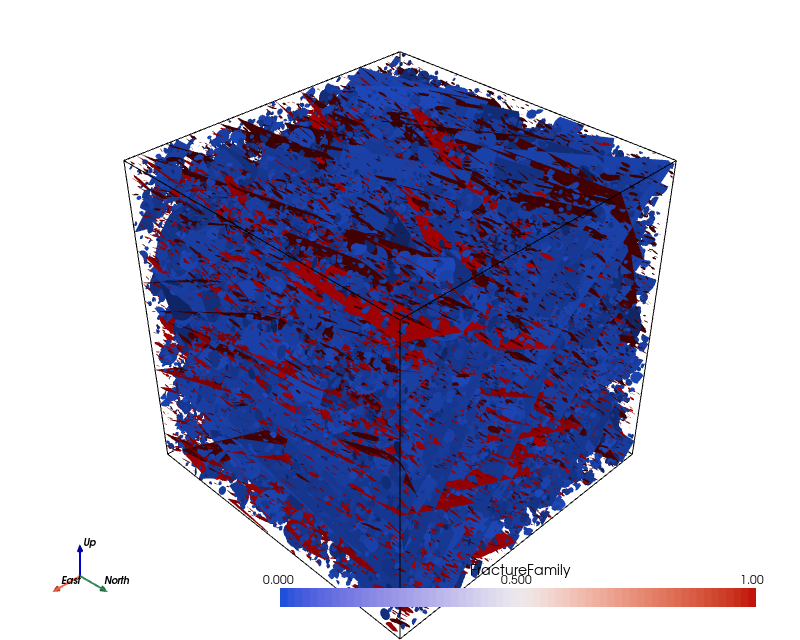

In [17]:
from sources.functions import plot_dfn    
plot_dfn(system,value="FractureFamily")

We plot the fracture size distribution below.

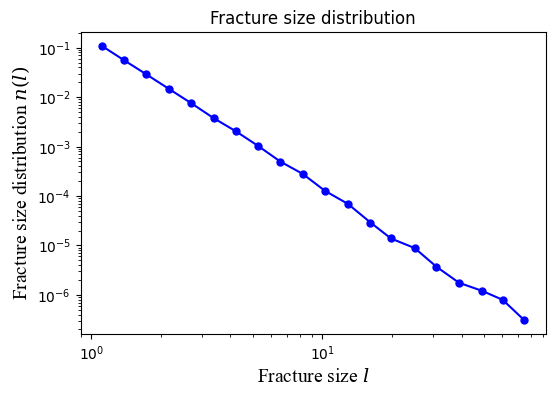

In [18]:
from sources.functions import plot_size_distribution
plot_size_distribution(system)

The stereonet plotted below reflects the characteristics expected from the 2 Fisher's distributions used to define the orientation model.

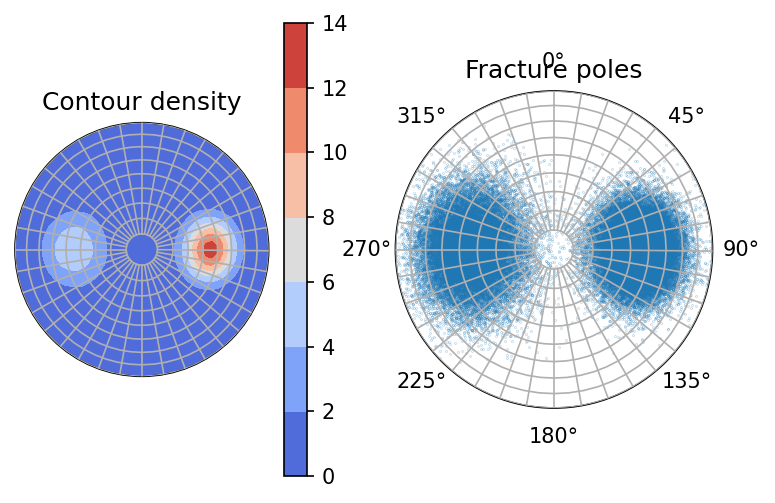

In [19]:
from sources.functions import plot_stereonet
plot_stereonet(fnet)